In [86]:
#Donald Bango
#Dr. Ofori
#DSC - 510
#18 Oct 2023
#YouTube Link: https://youtu.be/tNbY2rtrcRA

In [70]:
import pandas as pd
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [17]:
# https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data
# https://data.world/kudem By Kuzak Dempsy

In [ ]:
_=''' Notes
T-test: Use it when you have a large sample but do not know the population standard deviations. 
With a large sample, the t-distribution approaches the z-distribution, making the t-test equivalent to a z-test.
Z-test: Use it when you have a large sample and you do know the population standard deviations.
'''

In [30]:
# Load Dataset
data5 = pd.read_csv('/Users/don/Downloads/heart_data.csv')
columns_to_drop = ['index', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
data5 = data5.drop(columns=columns_to_drop)

# Convert age from days to years
data5['age'] = (data5['age'] / 365.25).round(2)

# Convert weight from kilograms to pounds
data5['weight'] = (data5['weight'] * 2.20462).round(2)

# Convert height from centimeters to inches
data5['height'] = (data5['height'] * 0.393701).round(2)

print(data5.head()) 
print(data5.columns)


# Age: Age of participant in years
# Gender: Gender of participant (female: 1/ male: 2)
# Height: Height measured in inches
# Weight: Weight measured in lbs

   id    age  gender  height  weight
0   0  50.36       2   66.14  136.69
1   1  55.38       1   61.42  187.39
2   2  51.63       1   64.96  141.10
3   3  48.25       2   66.54  180.78
4   4  47.84       1   61.42  123.46
Index(['id', 'age', 'gender', 'height', 'weight'], dtype='object')


In [29]:
# Check for missing values
missing_values = data5.isnull().sum()

print(missing_values)

id        0
age       0
gender    0
height    0
weight    0
dtype: int64


In [ ]:
_='''
Exploratory Data Analysis (EDA).
Summary Statistics: Such as mean, median, standard deviation, and percentiles.
Histograms: To see the distribution of the data.
Box Plots: To identify outliers and understand the distribution.
Scatter Plots: To see relationships between variables.
Pair Plots: To visualize all possible relationships in the dataset.
Correlation Matrices: To understand linear relationships between variables.
'''

In [53]:
# Summary statistics
summary = data5[['age', 'height', 'weight']].describe()

# Adding skewness and kurtosis
summary.loc['skew'] = data5[['age', 'height', 'weight']].skew()
summary.loc['kurtosis'] = data5[['age', 'height', 'weight']].kurt()

print(summary)

                   age        height        weight
count     70000.000000  70000.000000  70000.000000
mean         53.302869     64.708350    163.595188
std           6.754974      3.232571     31.737318
min          29.560000     21.650000     22.050000
25%          48.360000     62.600000    143.300000
50%          53.940000     64.960000    158.730000
75%          58.390000     66.930000    180.780000
max          64.920000     98.430000    440.920000
skew         -0.307069     -0.641836      1.012085
kurtosis     -0.823435      7.940677      2.586777


In [54]:
# Average Weight (gender based)
avg_weight_1 = data5[data5['gender'] == 1]['weight'].mean()
avg_weight_2 = data5[data5['gender'] == 2]['weight'].mean()
print("Average weight for gender code 1:", avg_weight_1)
print("Average weight for gender code 2:", avg_weight_2)

# Average Age (gender based)
avg_age_1 = data5[data5['gender'] == 1]['age'].mean()
avg_age_2 = data5[data5['gender'] == 2]['age'].mean()
print("\nAverage age for gender code 1:", avg_age_1)
print("Average age for gender code 2:", avg_age_2)

# Average Height (gender based)
avg_height_1 = data5[data5['gender'] == 1]['height'].mean()
avg_height_2 = data5[data5['gender'] == 2]['height'].mean()
print("\nAverage height for gender code 1:", avg_height_1)
print("Average height for gender code 2:", avg_height_2)


Average weight for gender code 1: 159.97942763013398
Average weight for gender code 2: 170.32283776052307

Average age for gender code 1: 53.41583834834176
Average age for gender code 2: 53.0926738863915

Average height for gender code 1: 63.525691631891064
Average height for gender code 2: 66.90885737637925


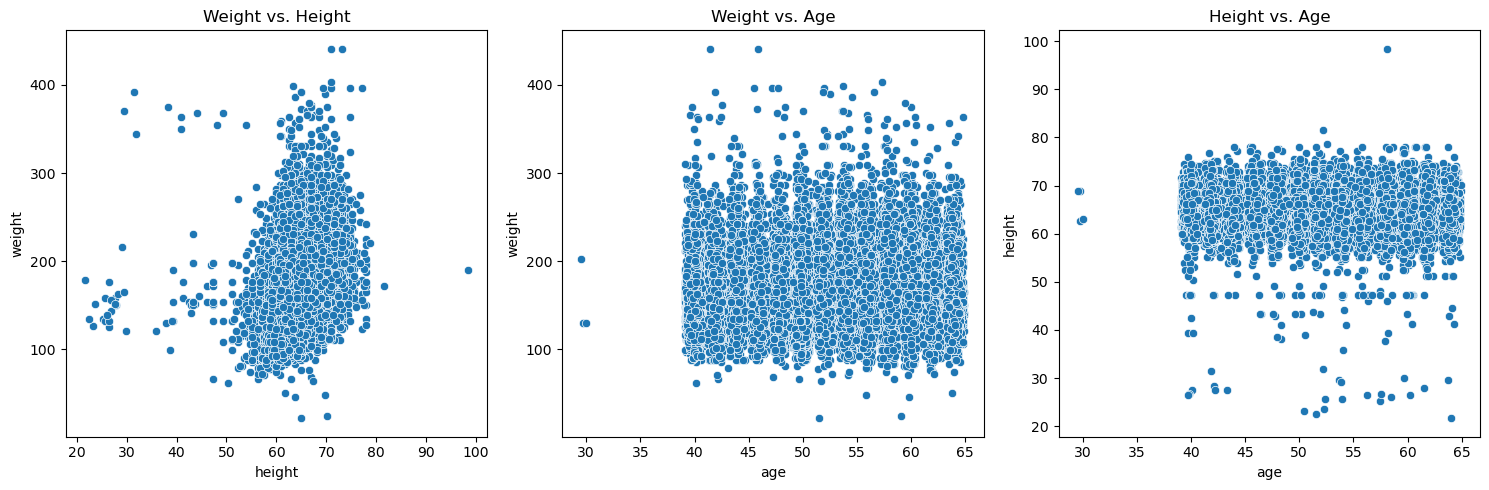

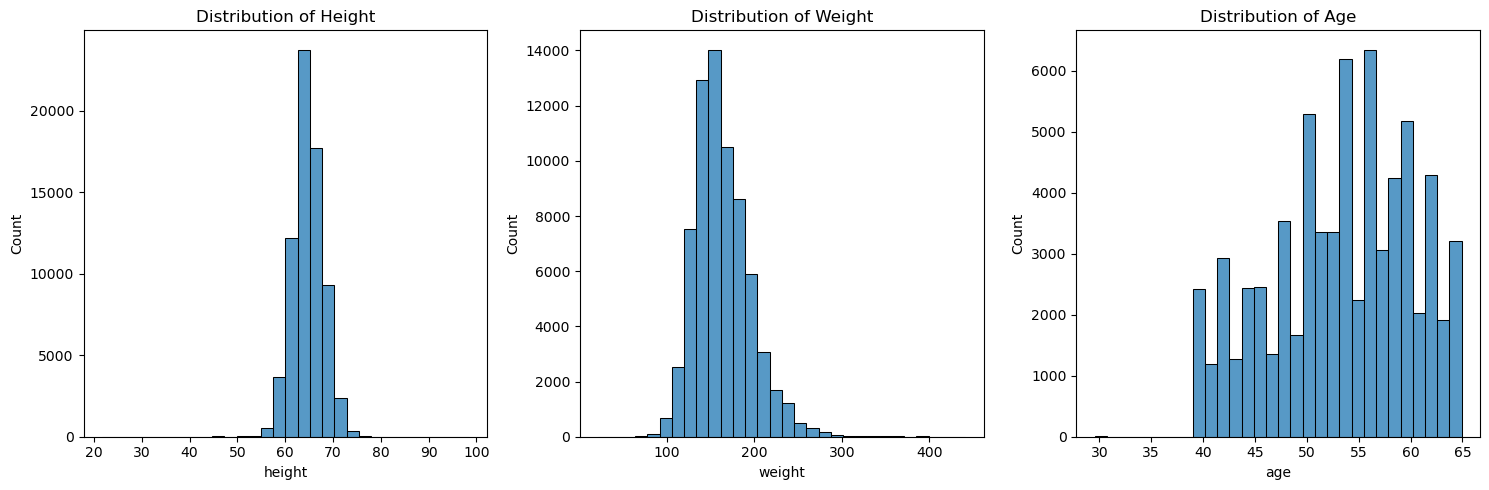

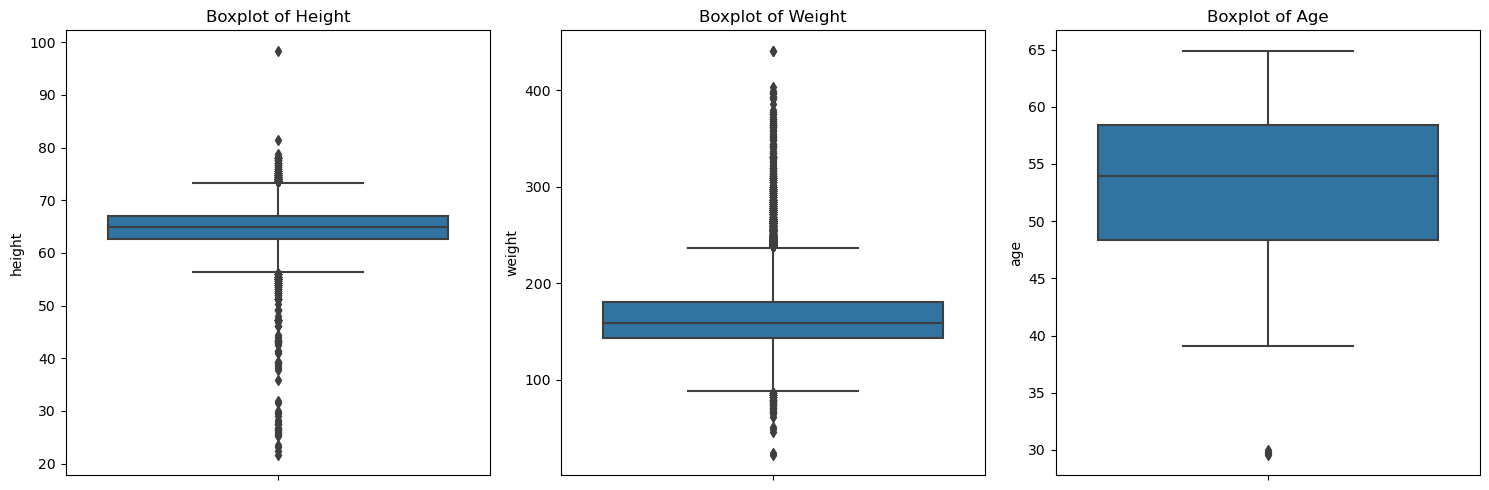

In [55]:
# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='height', y='weight', data=data5)
plt.title('Weight vs. Height')

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='weight', data=data5)
plt.title('Weight vs. Age')

plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='height', data=data5)
plt.title('Height vs. Age')

plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data5['height'], bins=30)
plt.title('Distribution of Height')

plt.subplot(1, 3, 2)
sns.histplot(data5['weight'], bins=30)
plt.title('Distribution of Weight')

plt.subplot(1, 3, 3)
sns.histplot(data5['age'], bins=30)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=data5['height'])
plt.title('Boxplot of Height')

plt.subplot(1, 3, 2)
sns.boxplot(y=data5['weight'])
plt.title('Boxplot of Weight')

plt.subplot(1, 3, 3)
sns.boxplot(y=data5['age'])
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()


In [ ]:
# Removing Outliers from the columns appears neccessary to have accurate and representative
# linear models.

In [43]:
# Task 1: Hypothesis Testing (t-test)
# H0: There is no significant difference in mean weight between males and females
# H1: There is a significant difference in mean weight between males and females

female_weights = data5[data5['gender'] == 1]['weight']
male_weights = data5[data5['gender'] == 2]['weight']

t_stat, p_value = stats.ttest_ind(female_weights, male_weights)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

_='''
The T-statistic of -41.621 suggests a significant difference between the mean weights of females and males. 
The P-value is less than 0.001, which is well below the typical confidence level of 0.05. 
Therfore, we reject the null hypothesis and conclude that there is a statistically significant difference 
in the mean weights of the two genders in the dataset.
'''

T-statistic: -41.621
P-value: 0.000


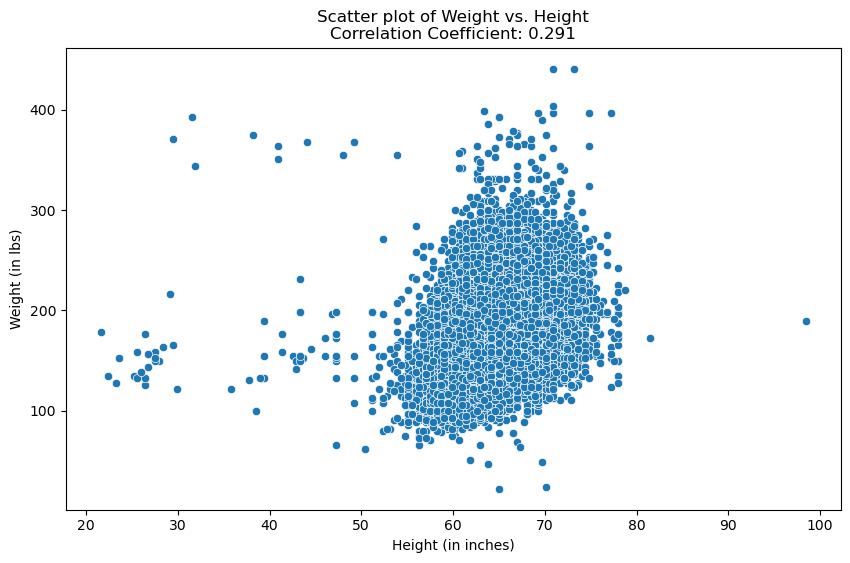

In [49]:
# Task 2 Correlation Coefficient: calculate the correlation coefficient between height and weight

# Calculate the Pearson correlation coefficient
correlation_coefficient = data5['height'].corr(data5['weight'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=data5)

# Annotate with the correlation coefficient
plt.title(f"Scatter plot of Weight vs. Height\nCorrelation Coefficient: {correlation_coefficient:.3f}")
plt.xlabel("Height (in inches)")
plt.ylabel("Weight (in lbs)")
plt.show()

_='''
In analyzing the relationship between height and weight, a Pearson's correlation coefficient of 
r=0.291 was observed, suggesting a weak to moderate positive linear association between the two variables. 
This indicates that as height increases, weight generally increases as well, but not strongly so. A scatter
plot visualization of the data confirmed this trend, with a broad distribution of points, hinting at other 
influential factors beyond height. While taller individuals in the dataset typically weigh more, height alone 
is not a strong predictor of weight, and other factors likely play a significant role. Outliers may be effecting this
outcome.
'''

In [59]:
# Task 3 Linear Regression Model:
# Assigning our independent and dependent variables
X = data5['height']
y = data5['weight']

# Adding a constant to the model (i.e., bias or intercept)
X = sm.add_constant(X)

# Fitting linear regression model
model = sm.OLS(y, X).fit()

# Printing the summary statistics of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6475.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:41:05   Log-Likelihood:            -3.3825e+05
No. Observations:               70000   AIC:                         6.765e+05
Df Residuals:                   69998   BIC:                         6.765e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.2610      2.300     -9.243      0.0

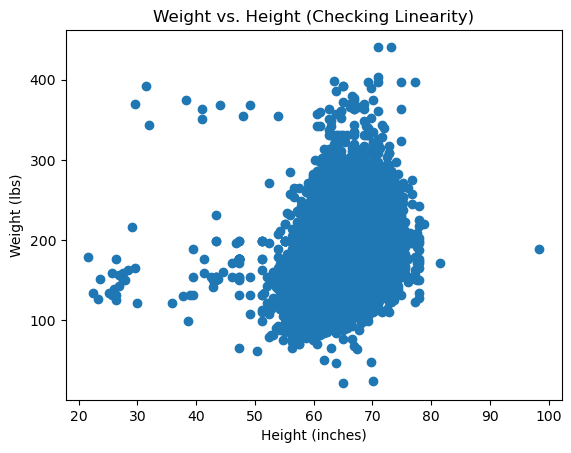

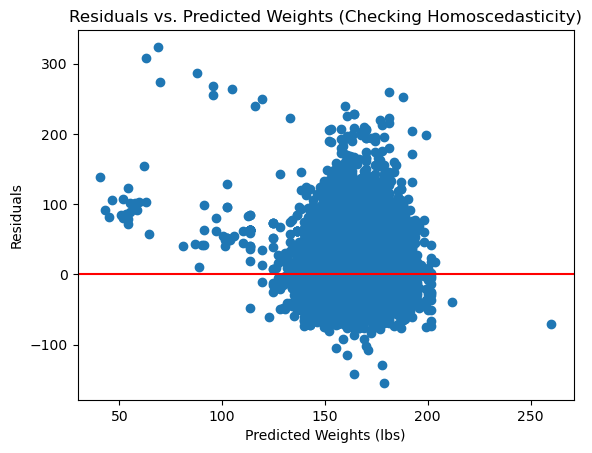

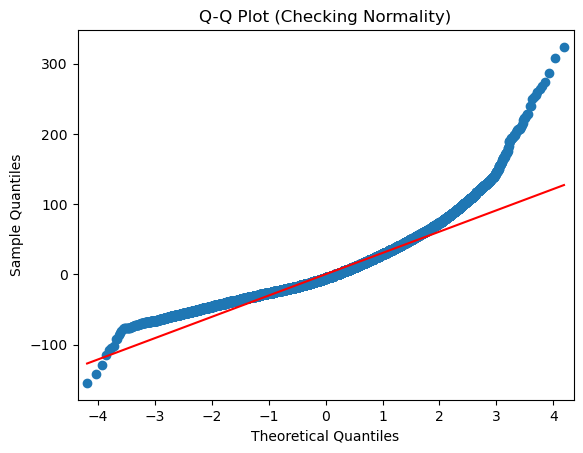

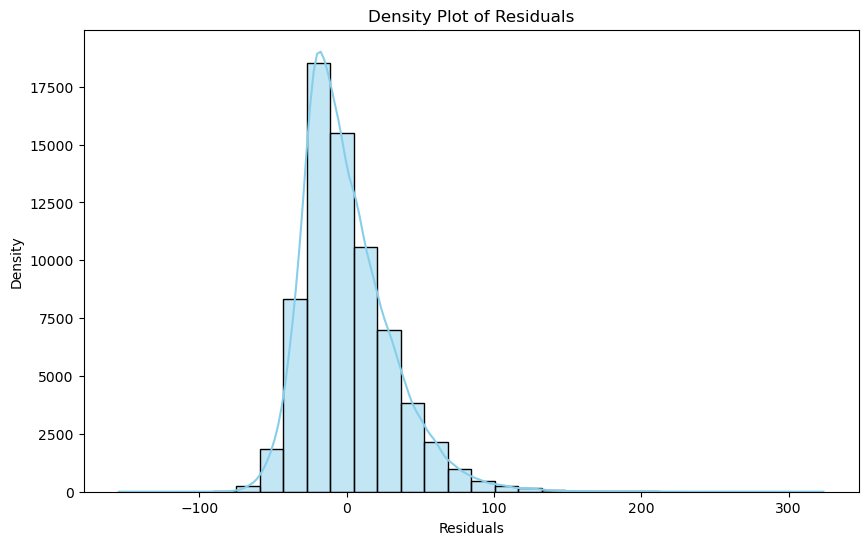

In [83]:
# Task 3: Model Assumptions
# Compute the residuals
data5['residuals'] = data5['weight'] - predicted_values

# Checking Linearity (plot repeat):
plt.scatter(data5['height'], data5['weight'])
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.title("Weight vs. Height (Checking Linearity)")
plt.show()
# Weak linear association 

# Checking Independence
# Durbin-Watson statistic is already provided in the model summary. 
# A value close to 2 suggests residuals are independent. Assumption appears satisfied.

# Checking Homoscedasticity:
plt.scatter(predicted_values, data5['residuals'])
plt.xlabel("Predicted Weights (lbs)")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals vs. Predicted Weights (Checking Homoscedasticity)")
plt.show()
#Scatter appears tear drop shaped, not randomly scattered

# Checking Normality of Residuals (Q-Q plot)
sm.qqplot(data5['residuals'], line='s')
plt.title("Q-Q Plot (Checking Normality)")
plt.show()
# Density Plot of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(data5['residuals'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()
#Skewed right (Violation of normality assumption)

# No Multicollinearity:
# Since we only have one independent variable, we do not have to check for multicollinearity.

# There appears to be multiple violations of the 5 assumptions assessed to run a linear regression model. 
# The data shold be reevaluated for accuracy or transformed. I noticed many outliers that can be removed.

In [69]:
# Task 4: Multiple Linear Regression Model (MLR)

# Defining our independent and dependent variables
X = data5[['height', 'age']]
X = sm.add_constant(X)  # Adds a constant (y-intercept) to the model
y = data5['weight']

# Fitting the regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3491.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:59:25   Log-Likelihood:            -3.3802e+05
No. Observations:               70000   AIC:                         6.761e+05
Df Residuals:                   69997   BIC:                         6.761e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.8087      2.540    -17.642      0.0

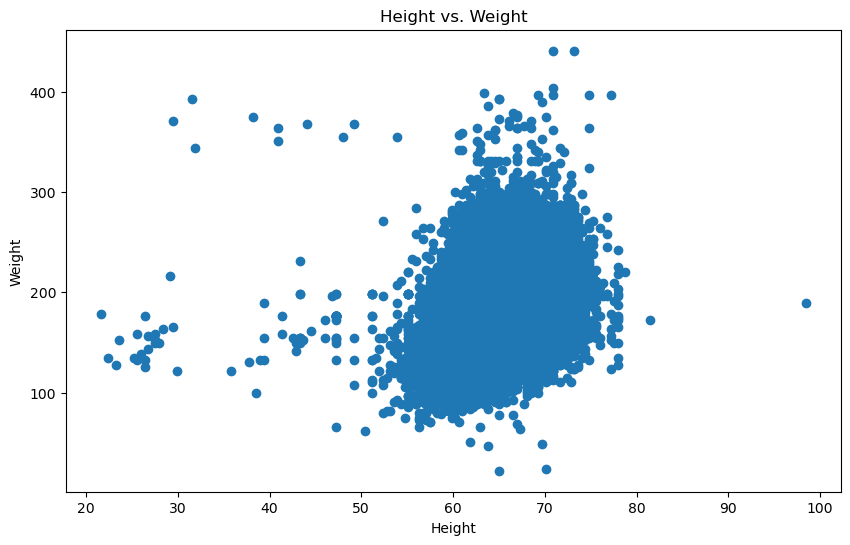

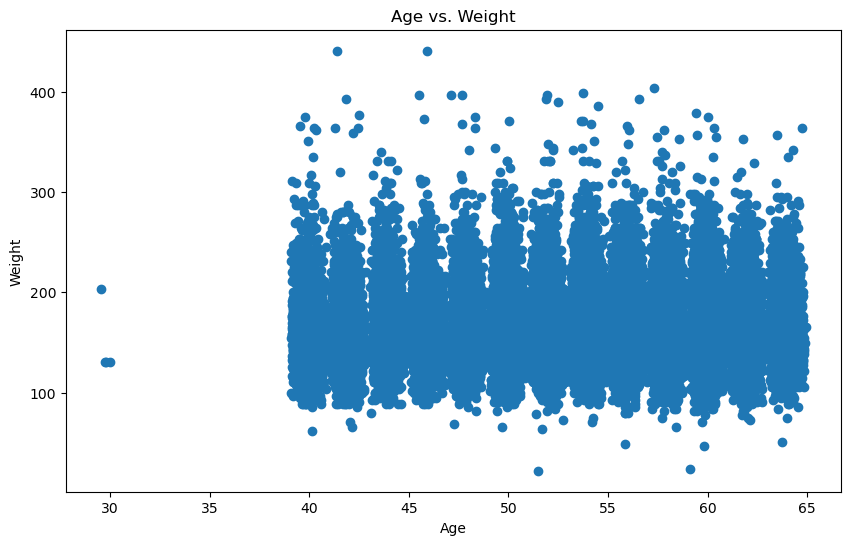

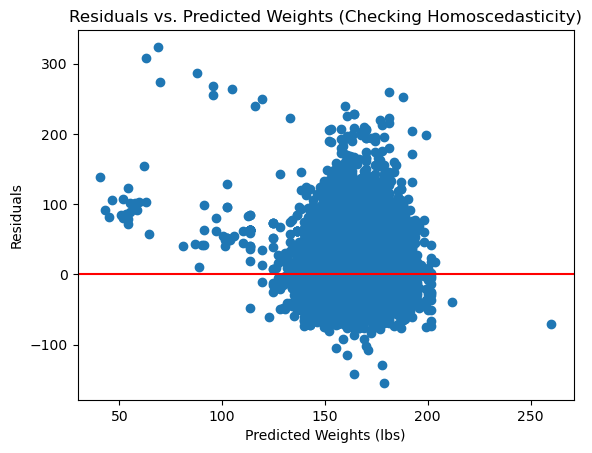

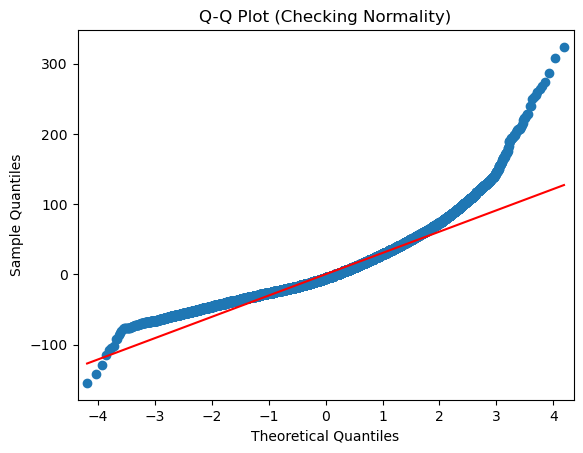

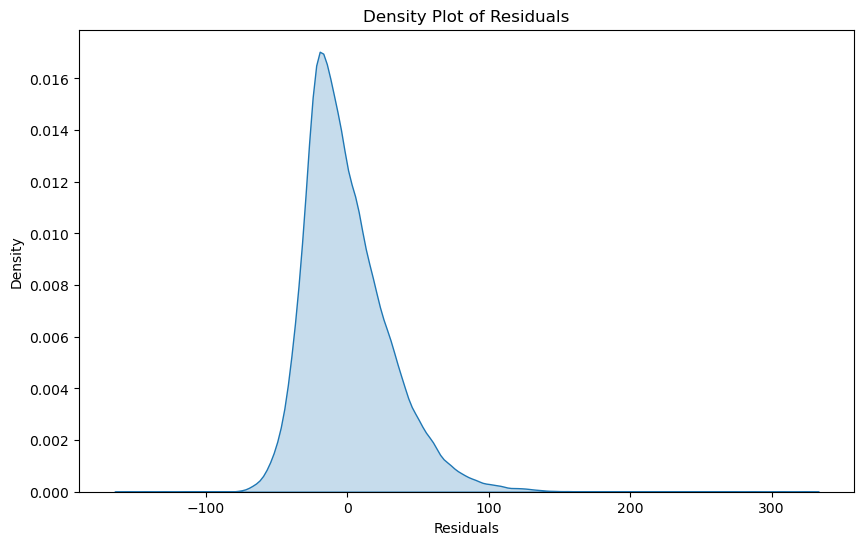

  Feature         VIF
0   const  492.998465
1  height    1.006689
2     age    1.006689


In [78]:
# Task 4: Multiple Linear Regression Model (MLR) Assumptions:

data5['residuals'] = data5['weight'] - predicted_values

# Checking Linearity:
# Scatter plot for 'height' vs. 'weight'
plt.figure(figsize=(10,6))
plt.scatter(data5['height'], data5['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')
plt.show()

# Scatter plot for 'age' vs. 'weight'
plt.figure(figsize=(10,6))
plt.scatter(data5['age'], data5['weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs. Weight')
plt.show()


# Checking Independence:
# Durbin-Watson statistic is already provided in the model summary. 
# A value close to 2 suggests residuals are independent.
# Also take a look at the residual plot

# Checking Homoscedasticity:
plt.scatter(predicted_values, data5['residuals'])
plt.xlabel("Predicted Weights (lbs)")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals vs. Predicted Weights (Checking Homoscedasticity)")
plt.show()

# Checking Normality of Residuals (Q-Q plot)
sm.qqplot(data5['residuals'], line='s')
plt.title("Q-Q Plot (Checking Normality)")
plt.show()

# Density Plot of Residuals
plt.figure(figsize=(10,6))
sns.kdeplot(data5['residuals'], label="Residuals' Density", fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title("Density Plot of Residuals")
plt.show()

# Checking Multicollinearity:
# Compute the VIF for each predictor
X = data5[['height', 'age']]
X = sm.add_constant(X)  # Adding a constant for the intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


In [ ]:
#Several assumptions critical for linear regression appear to be violated in the current model, namely linearity, 
#homoscedasticity, and normality of residuals. It's advisable to reevaluate the data for accuracy or consider transformations. 
#The presence of many outliers might be contributing to these violations, and investigating or addressing these outliers could
#be beneficial.

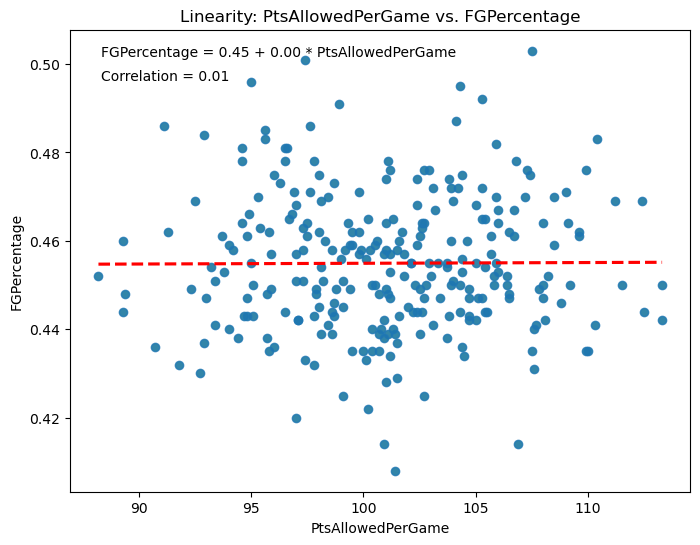

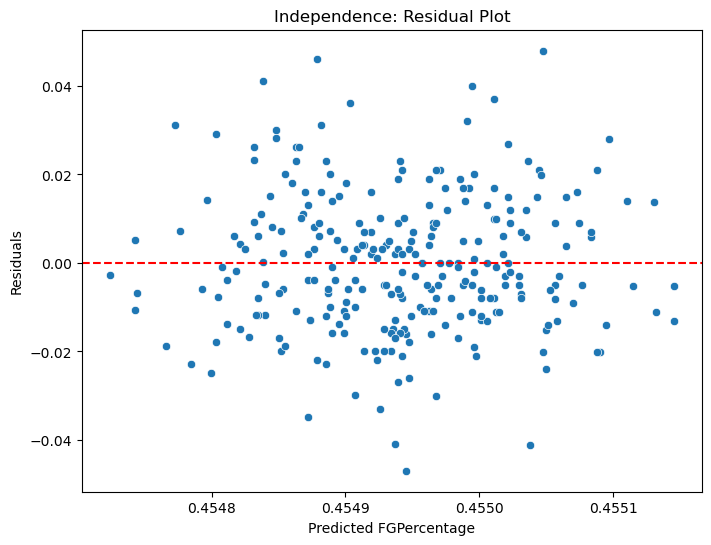

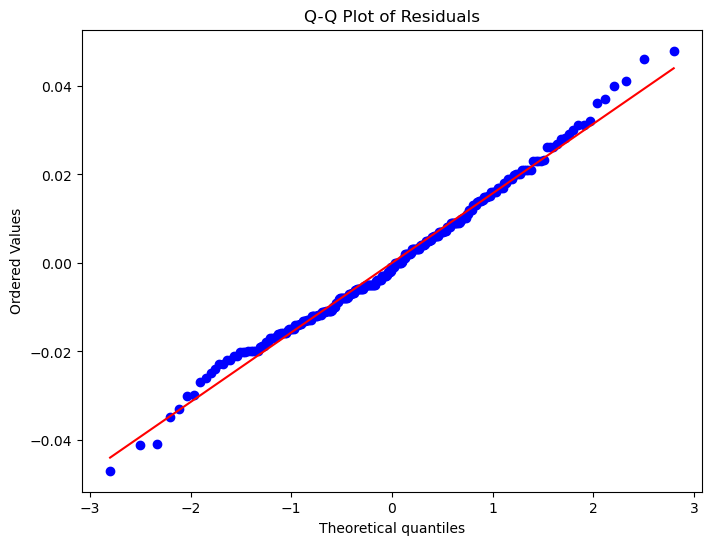

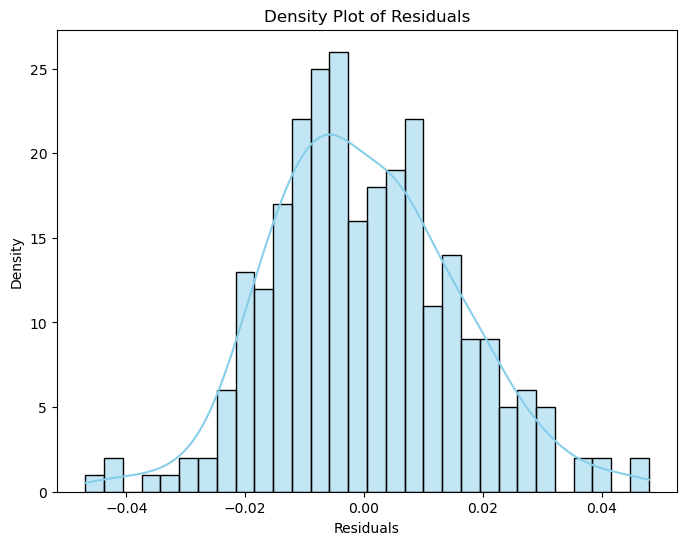

             Feature         VIF
0              const  417.409794
1  PtsAllowedPerGame    1.000000


In [84]:
# Task 5 Solutions:
_=''' Discuss two common assumptions of linear regression models:

# Linearity:
The relationship between the independent and dependent variable is linear. This assumption can be checked visually using scatter plots.
If the true relationship is non-linear but a linear model is fit, the model's predictions can be very inaccurate, especially for 
values of the independent variable that are outside the range of the data used to fit the model
When the true relationship between variables is non-linear and you fit a linear model, the slope and coefficients of the regression
equation can be biased.

# Normality:
In linear regression, accurate hypothesis tests, like determining the significance of coefficients using t-tests and F-tests, 
require the residuals to follow a roughly normal distribution.
We can check this assumption by creating a histogram of residuals or density plot which provides a
visual check on the assumption of normality. If the histogram looks roughly bell-shaped, the assumption is most likely met.
We can also use an Q-Q Plot (Quantile-Quantile Plot): In a Q-Q plot, the quantiles of the residuals are plotted against 
the quantiles of a standard normal distribution. If the residuals are normally distributed, the points should roughly 
fall on a straight line.
'''
data = pd.read_csv('/Users/don/Downloads/dataproject.csv', header=1) # setting header to be second row in the file.
#Rename columns for convenience and to remove special characters
data.rename(columns={
    'Year (2010-2018)': 'Year',
    'Latest Playoff Round (0 is missed playoffs, 5 is champion)': 'Latest Playoff Round',
    'Pts/Game': 'PtsPerGame',
    'Pts/Game Over Average': 'PtsPerGameOverAverage',
    'Pts Allowed/Game': 'PtsAllowedPerGame',
    'Pts Allowed/Game Over Average (Negative is Better)': 'PtsAllowedPerGameOverAverage',
    '3PT ATT Rate': 'ThreePointAttemptRate',
    'FTA/Game': 'FTAGame',
    'Players in Top 25 of PER': 'PlayersInTop25ofPER',
    'Average PER (Top 8 Players in mins played)': 'AveragePERTop8Players',
    'Net Rating': 'NetRating',
    '3%': 'ThreePercentage',
    'FG %': 'FGPercentage'
}, inplace=True)

# Fit a linear regression model
model = sm.OLS(data['FGPercentage'], sm.add_constant(data['PtsAllowedPerGame'])).fit()

# Linearity
plt.figure(figsize=(8, 6))

# Scatterplot
sns.scatterplot(x=data['PtsAllowedPerGame'], y=data['FGPercentage'], alpha=0.5, color='green')

# Regression line
sns.regplot(x=data['PtsAllowedPerGame'], y=data['FGPercentage'], ci=None, line_kws={"color": "red", "linestyle": "--"})

plt.xlabel('PtsAllowedPerGame')
plt.ylabel('FGPercentage')
plt.title('Linearity: PtsAllowedPerGame vs. FGPercentage')

# Get the coefficients
intercept = model.params['const']
slope = model.params['PtsAllowedPerGame']

# Print the equation of the line on the plot
equation = f'FGPercentage = {intercept:.2f} + {slope:.2f} * PtsAllowedPerGame'
plt.text(0.05, 0.95, equation, fontsize=10, transform=plt.gca().transAxes, ha='left', va='center')

# Calculate and display the correlation coefficient
correlation_coefficient = data['PtsAllowedPerGame'].corr(data['FGPercentage'])
plt.text(0.05, 0.9, f'Correlation = {correlation_coefficient:.2f}', fontsize=10, transform=plt.gca().transAxes, ha='left', va='center')

plt.show()

# Independence & Homoscedasticity 
predicted = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted, y=residuals)
plt.xlabel('Predicted FGPercentage')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Independence: Residual Plot')
plt.show()

# Normality 
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Density Plot using histplot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Multicollinearity (Checking Variation Inflation Factors)
X = sm.add_constant(data['PtsAllowedPerGame'])
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


In [ ]:
_='''
Findings:
Our regression model displayed a violation of the linearity assumption, with the data appearing randomly scattered. 
However, the other four key assumptions were met.
To address the non-linearity, a log transformation can be applied to the data, especially if an exponential 
relationship is suspected. We can ensure all data points are positive before this transformation and re-check assumptions 
post-transformation.
Despite the linearity challenge, using transformations like logarithms can potentially optimize our model's performance.
'''

In [85]:
# Task 6 Nonlinear Model:

# For the non-linear model, I'll use a Polynomial Regression which is a form of regression in which the relationship 
# between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial.
# Note: I am less familiar with this method

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the predictor and response variables
X = data['PtsAllowedPerGame'].values.reshape(-1, 1)
y = data['FGPercentage'].values

# Transform the predictor variable to a polynomial of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict using the polynomial model
y_poly_pred = poly_reg.predict(X_poly)

# Predict using the linear model from Task 5
y_linear_pred = model.predict(sm.add_constant(data['PtsAllowedPerGame']))

# Compute the mean squared error for both models
mse_linear = mean_squared_error(y, y_linear_pred)
mse_poly = mean_squared_error(y, y_poly_pred)

print(f"Mean Squared Error (Linear Model): {mse_linear}")
print(f"Mean Squared Error (Polynomial Model): {mse_poly}")


Mean Squared Error (Linear Model): 0.00024490069337106216
Mean Squared Error (Polynomial Model): 0.00024469710224072646


In [ ]:
_='''
In addressing potential non-linearity in our dataset, we applied a second-degree polynomial regression model 
and compared its performance to a previously established linear regression model. By using the PtsAllowedPerGame 
feature transformed into polynomial form to predict the FGPercentage target, we observed Mean Squared Error (MSE) 
metrics of 0.0002449 for the linear model and 0.0002447 for the polynomial model. While the polynomial regression 
slightly outperformed the linear approach, the difference in MSE is minimal. For a more comprehensive evaluation, 
testing both models on a separate dataset would provide insight into their generalization capabilities.
'''